## <u>EJERCICIO 1</u>
### **CLASIFICACION CON Red Densa**

### PASO 0 - Importo las librerias y carga del dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [ ]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [ ]:
print(target_names)
print(X.shape)
print(y.shape)
print(y[0])
print(X[0])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 125, 94)
(1288,)
5
[[0.99607843 0.99607843 0.9986928  ... 0.21699347 0.20261438 0.20653595]
 [0.99607843 0.9973857  0.99607843 ... 0.22222222 0.20261438 0.20653595]
 [0.9986928  0.9973857  0.99346405 ... 0.2248366  0.20522876 0.20522876]
 ...
 [0.3150327  0.29542485 0.2535948  ... 0.39346406 0.37908497 0.37124184]
 [0.29934642 0.2875817  0.2535948  ... 0.38562092 0.38300657 0.38300657]
 [0.27973858 0.27320263 0.25751635 ... 0.38431373 0.38039216 0.38039216]]


In [ ]:
#Funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

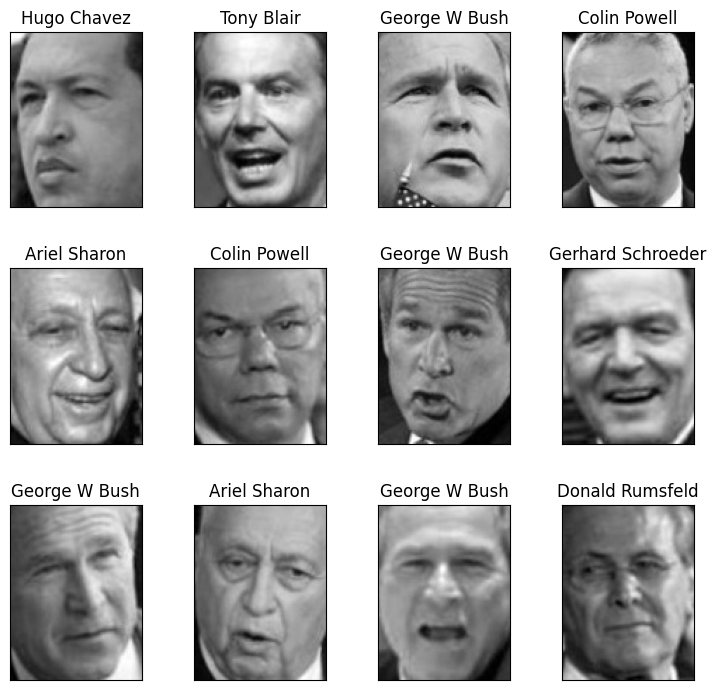

In [ ]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [ ]:
print(np.max(X))
print(np.min(X))

1.0
0.0


### PASO 1 - Divido las data en entrenamiento y test

In [ ]:
# Division de los datos normalizados

porc_test = 0.25
seed = 8 #8

x_entrenar, x_test, y_entrenar, y_test = train_test_split(X, y, test_size=porc_test, random_state=seed, shuffle=True)
x_testeo = x_test.copy()
print(f"Entrenamiento: {x_entrenar.shape}")
print(f"Testeo: {x_test.shape}")

Entrenamiento: (966, 125, 94)
Testeo: (322, 125, 94)


### PASO 2 - Parametros para entrenamiento y  preparacion de los datos

In [ ]:
# Estipulo los parametros para el entrenamiento de la red
lr = 0.001
epochs = 800
batch_size = 32 #32
np.random.seed(9) #9 14 42

# Preparacion de la data - Salida transformada a one-hot
y_entrenar = to_categorical(y_entrenar, n_classes)
y_test = to_categorical(y_test, n_classes)

# Convertir el vector de entrada a una dimension
x_entrenar.shape = (x_entrenar.shape[0], np.prod(x_entrenar.shape[1:]))
x_test.shape = (x_test.shape[0], np.prod(x_test.shape[1:]))

In [ ]:
print(x_entrenar.shape)
print(x_test.shape)

(966, 11750)
(322, 11750)


### PASO 3 - Creacion del modelo

In [ ]:
# Estructura de la red
input_layer = Input(shape=x_entrenar.shape[1:])
dense_1 = Dense(1000, activation="relu") (input_layer)
dense_2 = Dense(500, activation="relu") (dense_1)
dropout_1 = Dropout(0.1) (dense_2)
dense_4 = Dense(300, activation="relu") (dropout_1)
dense_5 = Dense(300, activation="relu") (dense_4)
dropout_2 = Dropout(0.1) (dense_5)
dense_7 = Dense(100, activation="relu") (dropout_2)
output_layer = Dense(n_classes, activation='softmax') (dense_7)

# Instancia del modelo
modelo = Model(input_layer, output_layer)

In [ ]:
optimizador = Adadelta(learning_rate=lr, rho=0.95)
modelo.compile(optimizer=optimizador, loss="categorical_crossentropy", metrics=["acc", "mse"])
modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11750)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │      11,751,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,522,907 (47.77 MB)

 Trainable params: 12,522,907 (47.77 MB)

 Non-trainable params: 0 (0.00 B)

### PASO 4 - Entrenamiento del modelo

In [ ]:
inicio = time.time()
historia = modelo.fit(x_entrenar, y_entrenar, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
final = time.time()
print('\nTiempo que demoro el entrenamiento: {:.3f} segundos'.format(final-inicio))

Epoch 1/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - acc: 0.1190 - loss: 2.0114 - mse: 0.1250 - val_acc: 0.4472 - val_loss: 1.8453 - val_mse: 0.1179
Epoch 2/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3401 - loss: 1.8725 - mse: 0.1190 - val_acc: 0.4441 - val_loss: 1.7383 - val_mse: 0.1118
Epoch 3/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4094 - loss: 1.7877 - mse: 0.1145 - val_acc: 0.4441 - val_loss: 1.6713 - val_mse: 0.1077
Epoch 4/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4039 - loss: 1.7438 - mse: 0.1118 - val_acc: 0.4441 - val_loss: 1.6428 - val_mse: 0.1059
Epoch 5/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3815 - loss: 1.7385 - mse: 0.1118 - val_acc: 0.4441 - val_loss: 1.6301 - val_mse: 0.1053
Epoch 6/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3863 - loss: 1.7334 - mse: 0.1117 - val_acc: 0.4441 - val_loss: 1.6236 - val_mse: 0.1050
Epoch 7/800
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3861 - loss: 1.7266 - mse: 0.1113 - val_acc

### PASO 5 - Evaluacion del entrenamiento del modelo

In [ ]:
historia.history.keys()

dict_keys(['acc', 'loss', 'mse', 'val_acc', 'val_loss', 'val_mse'])

In [ ]:
def grafico_comprobacion(train, test, minimo, maximo):

    plt.plot(historia.history[train], linewidth=1, label="Entrenamiento")
    plt.plot(historia.history[test], linewidth=1, label="Testeo")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.axis([0, epochs, minimo, maximo])
    plt.legend(loc="best")

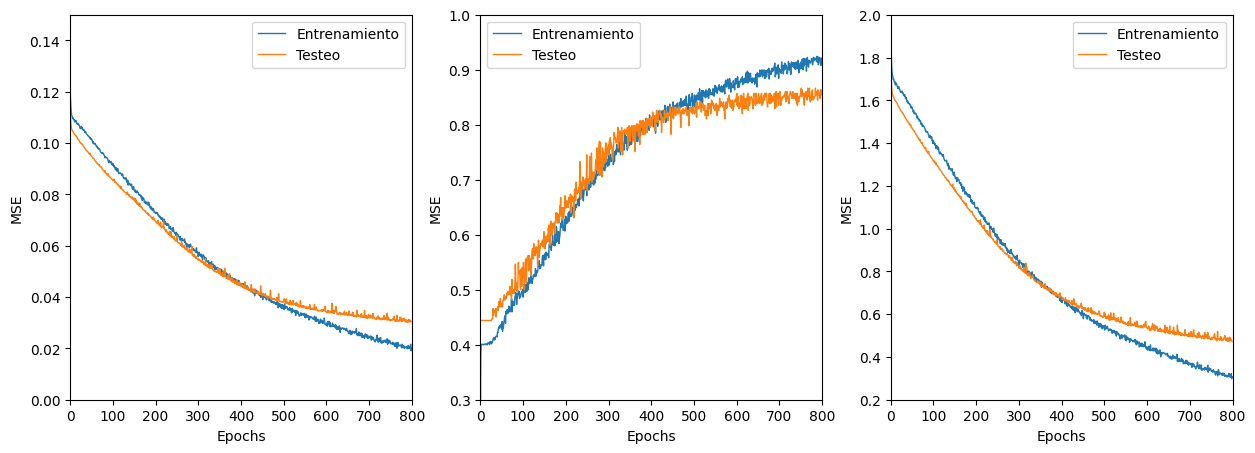

In [ ]:
f = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
grafico_comprobacion("mse", "val_mse", 0, 0.15)

plt.subplot(1,3,2)
grafico_comprobacion("acc", "val_acc", 0.3, 1)

plt.subplot(1,3,3)
grafico_comprobacion("loss", "val_loss", 0.2, 2)

plt.show()

In [ ]:
acc_test = modelo.evaluate(x_test, y_test,verbose=0)
acc_entrenamiento = modelo.evaluate(x_entrenar, y_entrenar,verbose=0)

print(f"Accuracy sobre conjunto de entrenamiento: {acc_entrenamiento[1]}")
print(f"Accuracy sobre conjunto de validacion:{acc_test[1]}")

Accuracy sobre conjunto de entrenamiento: 0.9368529915809631
Accuracy sobre conjunto de validacion:0.8540372848510742


### PASO 6 - Predicciones y evaluacion con Matriz de Confusion

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Matriz de confusion
[[ 12   3   2   1   0   0   1]
 [  1  48   1   4   0   0   2]
 [  1   2  19   4   1   0   1]
 [  2   2   0 137   0   0   2]
 [  0   0   0   2  19   1   3]
 [  0   1   0   2   1  11   1]
 [  0   0   0   3   2   1  29]]


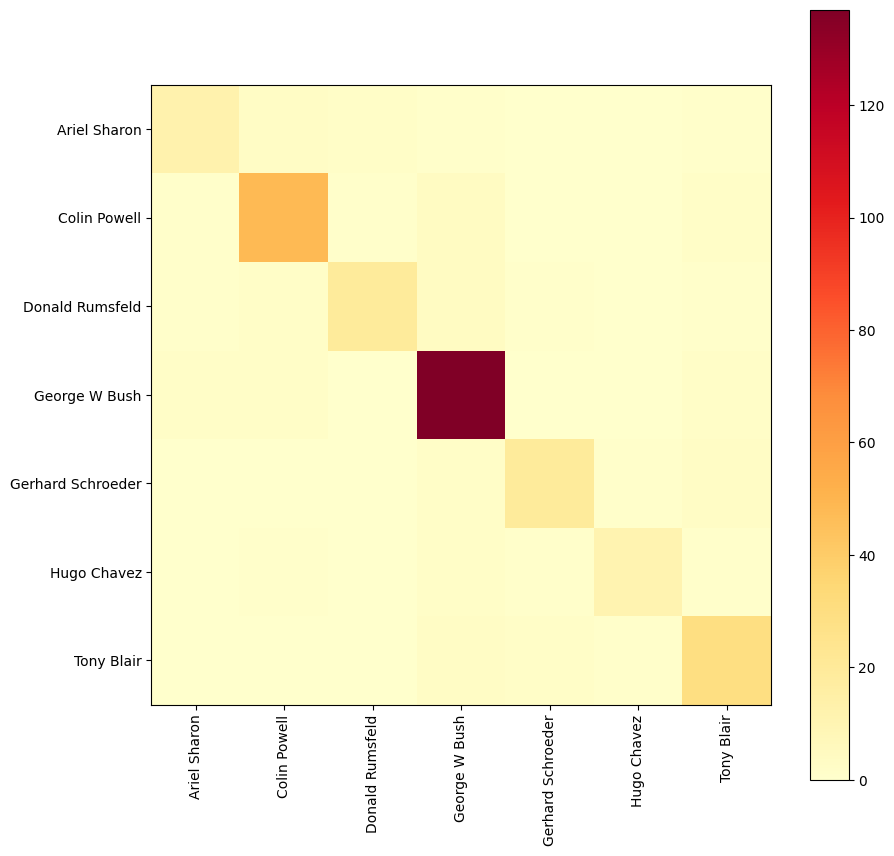

In [ ]:
# Predicciones con la data de testeo
y_prediccion = modelo.predict(x_test, verbose=1)

# Matriz de confusion y grafica
y_test_cm = np.argmax(y_test, axis=1)
y_prediccion_cm = np.argmax(y_prediccion, axis=1)
confm = confusion_matrix(y_test_cm, y_prediccion_cm)
print(f"\nMatriz de confusion")
print(confm)

f = plt.figure(figsize=(10,10))
plt.imshow(confm, cmap="YlOrRd")
plt.xticks(np.arange(7), target_names,rotation=90)
plt.yticks(np.arange(7), target_names,rotation=0)
plt.colorbar()
plt.show()


### PASO 7 - Otra verificacion



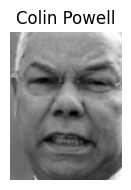

Salida conjunto de testeo: Colin Powell


In [ ]:
num = 23
images = x_testeo[num]
labels = target_names[y_prediccion_cm[num]]

f = plt.figure(figsize=(2,2))
plt.imshow(images, cmap='gray')
plt.title(labels)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Salida conjunto de testeo: {target_names[y_test_cm[num]]}")